In [64]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [65]:
class BatsmanState(TypedDict): #define state
   runs: int
   balls: int
   fours: int
   sixes: int

   sr:float
   bpb: float  #balls per boundary
   boundary_percentage:float
   summary: str


In [66]:
def calculate_sr(state:BatsmanState):
    sr=(state['runs']/state['balls'])*100
    
    return {'sr':sr}  # return state will give entire state to next node, so we can return only changed part through dictionary

  

In [67]:
def calculate_bpb(state:BatsmanState):
    bpb=state['balls']/(state['fours']+state['sixes'])
    
    return {'bpb':bpb} # we are updating only bpb in state

In [68]:
def calculate_boundary(state:BatsmanState):
    boundary_percentage=((state['fours']*4+state['sixes']*6)/state['runs'])*100
    
    return {'boundary_percentage':boundary_percentage} # we are updating only boundary_percentage in state

In [69]:
def summary(state:BatsmanState):
    summary=f""" 
strikerate- {state['sr']}\n
Balls Per boundary - {state['bpb']}\n
boundary percent - {state['boundary_percentage']}
"""
   
    return {'summary':summary} #we are updating only summary in state

In [70]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary',calculate_boundary)
graph.add_node('summary',summary)

graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary')
graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary','summary')
graph.add_edge('summary',END)
workflow=graph.compile()



In [71]:
initial_state={
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
    }
final_state=workflow.invoke(initial_state)
print(final_state['summary'])

 
strikerate- 200.0

Balls Per boundary - 5.0

boundary percent - 48.0



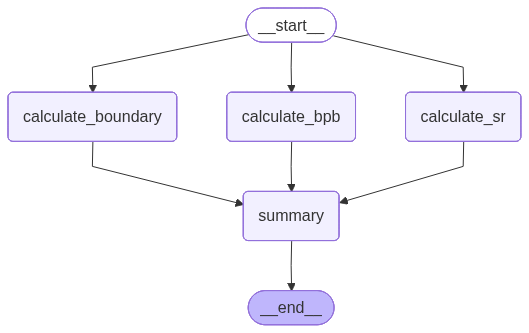

In [72]:

graph.compile()